# Challenge 6 Plotting with Seaborn

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

##  Make a high quality plot

In [2]:
# 1. Open empty jupyter notebook and read in the dataframe that contains your gapminder data
df = pd.read_csv('../data/gapminder_total.csv')

In [42]:
df.rename(columns={"Continenr": "Continent"}, inplace=True)

In [43]:
df.head()

,country,year,life expectancy,Continent,population,fertility
0,Afghanistan,1950,26.85,Asia,7752118.0,7.67
1,Afghanistan,1951,27.13,Asia,7839426.0,7.67
2,Afghanistan,1952,27.67,Asia,7934798.0,7.67
3,Afghanistan,1953,28.19,Asia,8038312.0,7.67
4,Afghanistan,1954,28.73,Asia,8150037.0,7.67


In [45]:
# 2. Create subset of data for one year
year_filter = df['year'] == 2015
df_subset = df[year_filter]
df_subset.head()

,country,year,life expectancy,Continent,population,fertility
65,Afghanistan,2015,53.8,Asia,32526562.0,4.47
131,Albania,2015,78.0,Europe,2896679.0,1.78
197,Algeria,2015,76.4,Africa,39666519.0,2.71
263,Angola,2015,59.6,Africa,25021974.0,5.65
329,Antigua and Barbuda,2015,76.4,North America,91818.0,2.06


/Users/eytansonsino/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/Users/eytansonsino/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


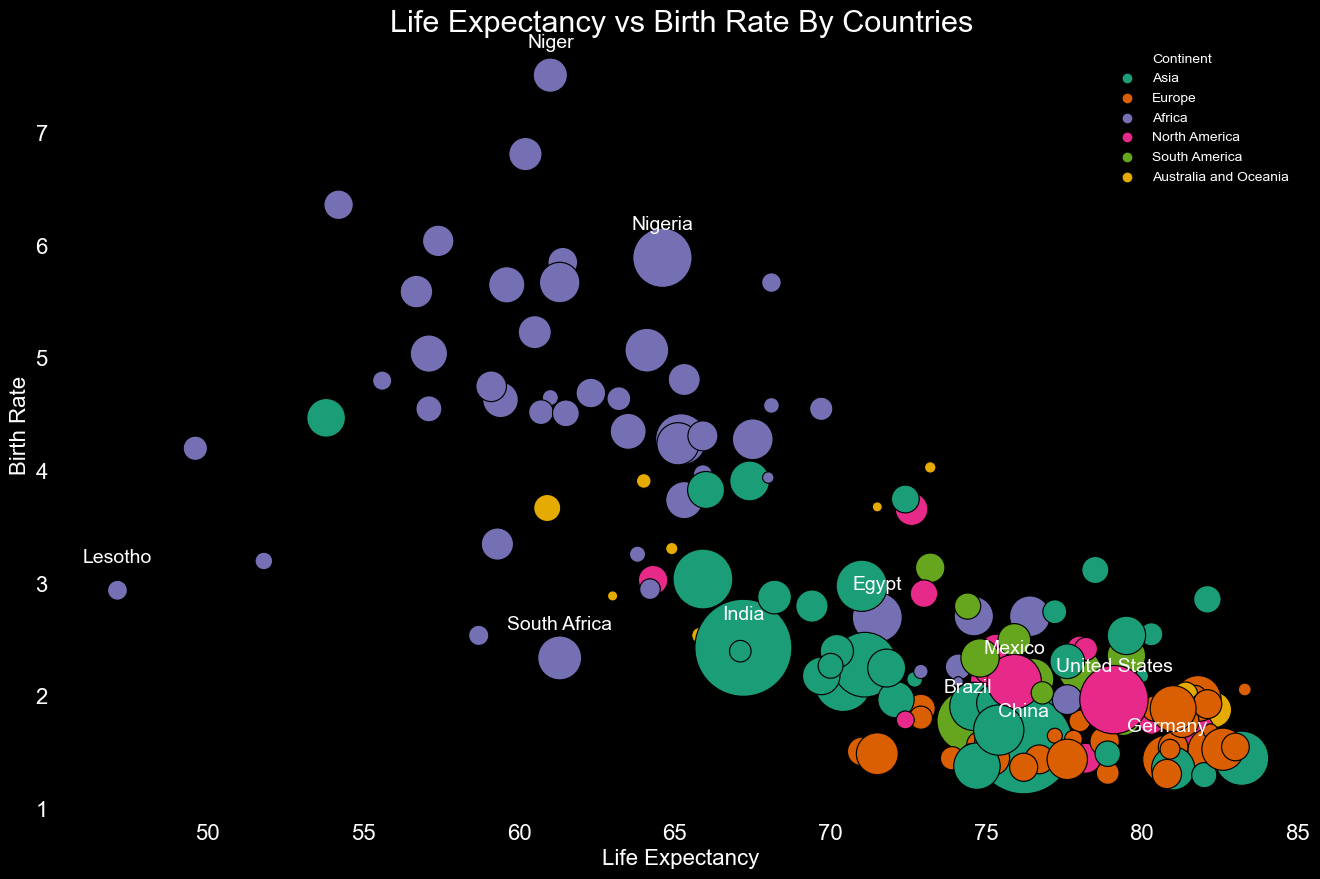

In [50]:
sns.set(style="dark") 
plt.style.use("dark_background")

plt.figure(figsize=(16, 10))
plt.title(f'Life Expectancy vs Birth Rate By Countries', fontsize=22)
plt.ylabel('Birth Rate', fontsize=16)
plt.xlabel('Life Expectancy', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Apply a square root transformation and increase the range of point sizes
size_transformed = np.sqrt(df_subset['population'])
sns.scatterplot(x='life expectancy', y='fertility', hue='Continent', 
                size=size_transformed, data=df, alpha=1, sizes=(50, 5000), edgecolor='black', palette='Dark2')

# Get handles and labels from the legend
handles, labels = plt.gca().get_legend_handles_labels()
population_scaling_factor = 1e-5

# Filter out handles and labels for population sizes
# Assuming the last few handles are for the sizes (population)
n_continents = len(df_subset['Continent'].unique())
handles, labels = handles[:n_continents + 1], labels[:n_continents + 1]

# Position the modified legend in the top right corner
plt.legend(handles, labels, loc='upper right', fontsize=10, markerscale=1, frameon=False)

                
# Define a function to annotate some countries
def annotate_country(country_name, df_subset):
    country_data = df_subset[df_subset['country'] == country_name]
    plt.annotate(country_name, (country_data['life expectancy'], country_data['fertility']),
                 textcoords="offset points", xytext=(0, 20), ha='center', fontsize=14, color='white')

# Annotate the countries and use it with a for loop to iterate
countries_to_annotate = ['China', 'India', 'United States', 'Germany',
                          'Nigeria', 'Lesotho', 'Niger',
                         'Brazil', 'South Africa', 'Mexico', 'Egypt']

for country in countries_to_annotate:
    annotate_country(country, df_subset)

# Save the plot for each year if needed
#plt.savefig(f'life_expectancy_vs_birth_rate_{year}.png')

#plt.legend().set_visible(False)

# Changing the color of the plot's outer borderlines to black
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')

plt.savefig('../weekly_project/one_year.png')
    
# Close the plot
plt.show()



In [54]:
# Assuming you have a loop over the years
for year in range(1950, 2016):
    df_subset = df[df['year'] == year]  # Filter the data for the current year
    
    sns.set(style="dark") 
    plt.style.use("dark_background")

    plt.figure(figsize=(16, 10))
    plt.title(f'Life Expectancy vs Birth Rate By Countries ({year})', fontsize=22)
    plt.ylabel('Birth Rate', fontsize=16)
    plt.xlabel('Life Expectancy', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Apply a square root transformation and increase the range of point sizes
    size_transformed = np.sqrt(df_subset['population'])
    sns.scatterplot(x='life expectancy', y='fertility', hue='Continent', 
                    size=size_transformed, data=df, alpha=1, sizes=(50, 5000), edgecolor='black', palette='Dark2')

    # Get handles and labels from the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    population_scaling_factor = 1e-5

    # Filter out handles and labels for population sizes
    # Assuming the last few handles are for the sizes (population)
    n_continents = len(df_subset['Continent'].unique())
    handles, labels = handles[:n_continents + 1], labels[:n_continents + 1]

    # Position the modified legend in the top right corner
    plt.legend(handles, labels, loc='upper right', fontsize=10, markerscale=1, frameon=False)
    
    plt.axis([30, 85, 0, 9])
    
    # Changing the color of the plot's outer borderlines to black
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_edgecolor('black')

    # Define a function to annotate some countries
    def annotate_country(country_name, df_subset):
        country_data = df_subset[df_subset['country'] == country_name]
        plt.annotate(country_name, (country_data['life expectancy'], country_data['fertility']),
                     textcoords="offset points", xytext=(0, 20), ha='center', fontsize=14, color='white')

    # Annotate the countries and use it with a for loop to iterate
    countries_to_annotate = ['China', 'India', 'United States', 'Germany',
                              'Nigeria', 'Lesotho', 'Niger',
                             'Brazil', 'South Africa', 'Mexico', 'Egypt']

    for country in countries_to_annotate:
        annotate_country(country, df_subset)

    # Save the plot for each year if needed
    plt.savefig(f'../life_exp_vs_bt_rate/life_expectancy_vs_birth_rate_{year}.png')

    # Close the plot
    plt.close()

/Users/eytansonsino/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/Users/eytansonsino/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/Users/eytansonsino/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/Users/eytansonsino/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.i

/Users/eytansonsino/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/Users/eytansonsino/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/Users/eytansonsino/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/Users/eytansonsino/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.i

/Users/eytansonsino/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/Users/eytansonsino/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/Users/eytansonsino/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/Users/eytansonsino/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.i

/Users/eytansonsino/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/Users/eytansonsino/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/Users/eytansonsino/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/Users/eytansonsino/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.i

In [55]:
import imageio

images = []

for year in range(1950, 2016):
    filename = f'../life_exp_vs_bt_rate/life_expectancy_vs_birth_rate_{year}.png'
    images.append(imageio.imread(filename))

imageio.mimsave(f'../life_exp_vs_bt_rate/all_years_combined5.gif', images, duration=8)

/var/folders/r9/xv1vjygj609_knwb8fj_mvl80000gn/T/ipykernel_10170/4261570705.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
